In [100]:
pwd

'C:\\Users\\Luqna Aziziyah\\Documents\\luqna\\kuliah\\sems 4\\stat multi'

# 1. Data Collecting

In [101]:
import numpy as np
import pandas as pd

df = pd.read_csv('breast_cancer.csv')
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [102]:
df.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

# 2. processing data

In [103]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Split the dataset into features and target variable
X = df.drop('Classification', axis=1)
y = df['Classification']

# Create a logistic regression model
model = LogisticRegression()

# Create the RFE object and specify the number of features to select (k)
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit the RFE model to the data
rfe.fit(X, y)

# Print the ranking of the features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
feature_ranking = feature_ranking.sort_values(by='Ranking')
print(feature_ranking)


       Feature  Ranking
4         HOMA        1
3      Insulin        2
1          BMI        3
2      Glucose        4
7     Resistin        5
0          Age        6
5       Leptin        7
6  Adiponectin        8
8        MCP.1        9


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [104]:
#ubah tipe data kolom numerikal menjadi float
for col in df:
    df = df.astype('float')
    
df.dtypes

Age               float64
BMI               float64
Glucose           float64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification    float64
dtype: object

In [105]:
import pandas as pd

# Mendeteksi data duplikat
duplikat = df.duplicated()

# Menampilkan jumlah data yang duplikat
print("Jumlah data yang duplikat: ", duplikat.sum())

# Menghapus data duplikat berdasarkan semua kolom
df = df.drop_duplicates()

print("Jumlah data sebelum dihapus: ", len(df)+duplikat.sum())
print("Jumlah data setelah dihapus: ", len(df))

Jumlah data yang duplikat:  0
Jumlah data sebelum dihapus:  116
Jumlah data setelah dihapus:  116


In [106]:
df= df.drop('Adiponectin',axis=1)
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Resistin,MCP.1,Classification
0,48.0,23.500000,70.0,2.707,0.467409,8.8071,7.99585,417.114,1.0
1,83.0,20.690495,92.0,3.115,0.706897,8.8438,4.06405,468.786,1.0
2,82.0,23.124670,91.0,4.498,1.009651,17.9393,9.27715,554.697,1.0
3,68.0,21.367521,77.0,3.226,0.612725,9.8827,12.76600,928.220,1.0
4,86.0,21.111111,92.0,3.549,0.805386,6.6994,10.57635,773.920,1.0
...,...,...,...,...,...,...,...,...,...
111,45.0,26.850000,92.0,3.330,0.755688,54.6800,10.96000,268.230,2.0
112,62.0,26.840000,100.0,4.530,1.117400,12.4500,7.32000,330.160,2.0
113,65.0,32.050000,97.0,5.730,1.370998,61.4800,10.33000,314.050,2.0
114,72.0,25.590000,82.0,2.820,0.570392,24.9600,3.27000,392.460,2.0


In [107]:
df.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

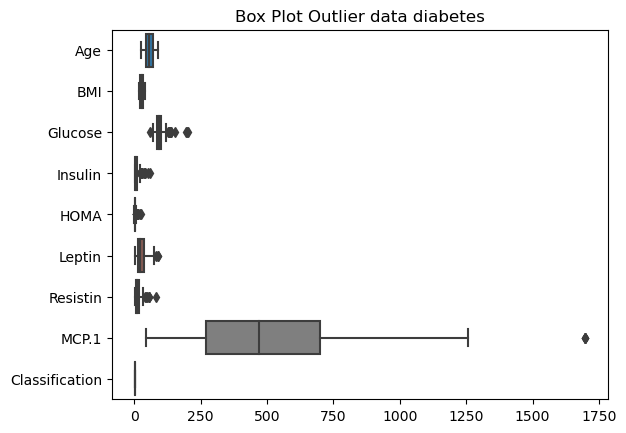

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat box plot
sns.boxplot(data=df, orient='h')
plt.title('Box Plot Outlier data diabetes')
plt.show()


Outliers: [47, 78, 87, 88, 89, 90, 93, 94, 105, 108, 109, 115]


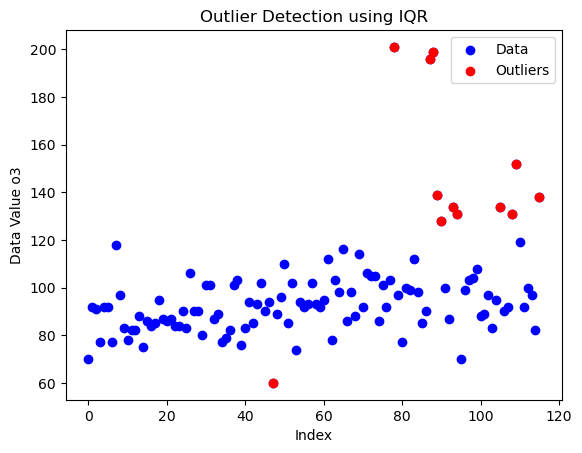

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mendapatkan kolom yang ingin dianalisis
data = df['Glucose'].values  

# Mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = []
    for i, value in enumerate(data):
        if value < lower_bound or value > upper_bound:
            outliers.append(i)
    return outliers

outliers = detect_outliers_iqr(data)
print("Outliers:", outliers)

# Visualisasi dalam scatter plot
plt.scatter(range(len(data)), data, color='b', label='Data')
plt.scatter(outliers, [data[i] for i in outliers], color='r', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Data Value o3')
plt.title('Outlier Detection using IQR')
plt.legend()
plt.show()


Outliers: [33, 50, 55, 71, 74, 78, 79, 82, 87, 90, 92, 93, 94]


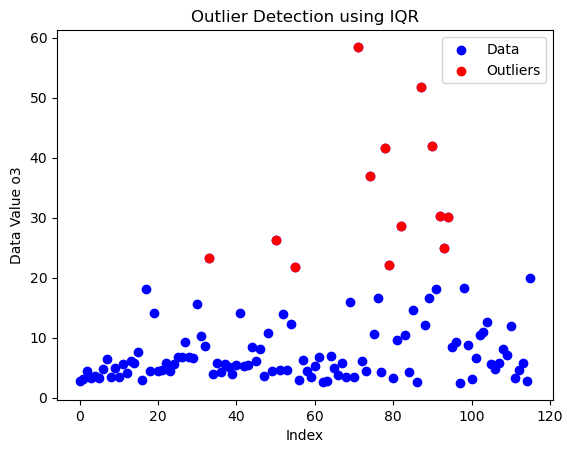

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mendapatkan kolom yang ingin dianalisis
data = df['Insulin'].values  

# Mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = []
    for i, value in enumerate(data):
        if value < lower_bound or value > upper_bound:
            outliers.append(i)
    return outliers

outliers = detect_outliers_iqr(data)
print("Outliers:", outliers)

# Visualisasi dalam scatter plot
plt.scatter(range(len(data)), data, color='b', label='Data')
plt.scatter(outliers, [data[i] for i in outliers], color='r', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Data Value o3')
plt.title('Outlier Detection using IQR')
plt.legend()
plt.show()


Outliers: [50, 71, 74, 78, 82, 87, 88, 90, 92, 93, 94, 115]


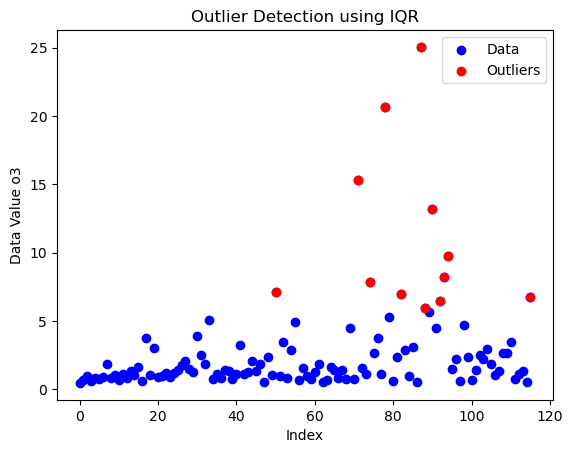

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mendapatkan kolom yang ingin dianalisis
data = df['HOMA'].values  

# Mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = []
    for i, value in enumerate(data):
        if value < lower_bound or value > upper_bound:
            outliers.append(i)
    return outliers

outliers = detect_outliers_iqr(data)
print("Outliers:", outliers)

# Visualisasi dalam scatter plot
plt.scatter(range(len(data)), data, color='b', label='Data')
plt.scatter(outliers, [data[i] for i in outliers], color='r', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Data Value o3')
plt.title('Outlier Detection using IQR')
plt.legend()
plt.show()


Outliers: [37, 77, 83, 84, 87, 88, 98]


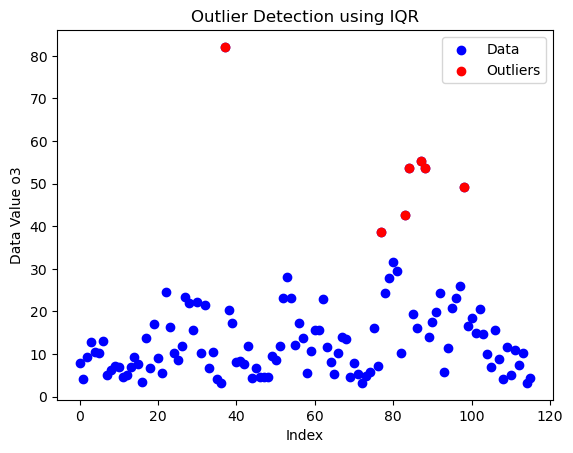

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mendapatkan kolom yang ingin dianalisis
data = df['Resistin'].values  

# Mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = []
    for i, value in enumerate(data):
        if value < lower_bound or value > upper_bound:
            outliers.append(i)
    return outliers

outliers = detect_outliers_iqr(data)
print("Outliers:", outliers)

# Visualisasi dalam scatter plot
plt.scatter(range(len(data)), data, color='b', label='Data')
plt.scatter(outliers, [data[i] for i in outliers], color='r', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Data Value o3')
plt.title('Outlier Detection using IQR')
plt.legend()
plt.show()


In [113]:
import pandas as pd
import numpy as np

def outlier_num(df):
    num_cols = df.select_dtypes(include=np.number).columns.tolist()  # Get numerical columns dynamically
    # Display summary statistics for the numerical columns before and after Winsorizing
    print("Before Winsorizing:")
    print(df.describe())
    print("\nAfter Winsorizing:")
    for col in num_cols:
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    print(df[num_cols].describe())

outlier_num(df)


Before Winsorizing:
              Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

         Resistin        MCP.1  Classification  
count  116.000000   116.000000      116.000000  
mean    14.725966   534.647000        1.551724  
std     12.390646   345.912663        0.499475  
min      3.210000    45.843000        1.000000  
25%  

In [114]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Split the dataset into features and target variable
X = df.drop('Classification', axis=1)
y = df['Classification']

# Create a logistic regression model
model = LogisticRegression()

# Create the RFE object and specify the number of features to select (k)
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit the RFE model to the data
rfe.fit(X, y)

# Print the ranking of the features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
feature_ranking = feature_ranking.sort_values(by='Ranking')
print(feature_ranking)


    Feature  Ranking
4      HOMA        1
1       BMI        2
6  Resistin        3
2   Glucose        4
0       Age        5
5    Leptin        6
3   Insulin        7
7     MCP.1        8


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

                     Age       BMI   Glucose   Insulin      HOMA    Leptin  \
Age             1.000000  0.008530  0.200064  0.024855  0.047586  0.093573   
BMI             0.008530  1.000000  0.160604  0.246839  0.238334  0.583212   
Glucose         0.200064  0.160604  1.000000  0.452239  0.583611  0.287057   
Insulin         0.024855  0.246839  0.452239  1.000000  0.973651  0.387364   
HOMA            0.047586  0.238334  0.583611  0.973651  1.000000  0.371799   
Leptin          0.093573  0.583212  0.287057  0.387364  0.371799  1.000000   
Resistin       -0.054703  0.187999  0.103142  0.153289  0.167957  0.197968   
MCP.1           0.004099  0.240441  0.042489  0.162756  0.178057  0.036180   
Classification -0.043555 -0.132586  0.440390  0.274489  0.331045 -0.009337   

                Resistin     MCP.1  Classification  
Age            -0.054703  0.004099       -0.043555  
BMI             0.187999  0.240441       -0.132586  
Glucose         0.103142  0.042489        0.440390  
Insulin

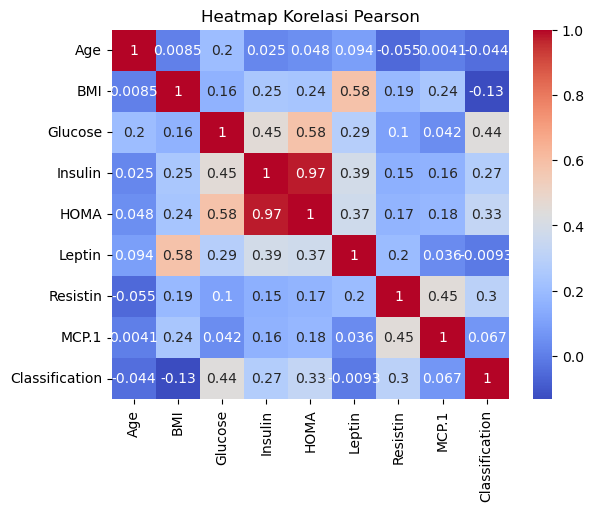

In [115]:
# melihat korelasi sebelum dianalisis

import matplotlib.pyplot as plt
import seaborn as sns

# melihat korelasi antara variabel pada dataset menggunakan metode Pearson correlation
corr_matrix = df.corr(method='pearson')
print(corr_matrix)

# membuat heatmap korelasi
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Pearson")
plt.show()


In [116]:
for col in df:
    df['Classification'] = df['Classification'].astype('int')

In [117]:

def min_max_normalization(df, columns):
    data_normalized = df.copy()
    for column in columns:
        data_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
        # Bulatkan nilai hasil normalisasi menjadi tiga angka di belakang koma
        data_normalized[column] = data_normalized[column].round(decimals=3)
    return data_normalized

# Contoh penggunaan fungsi hanya pada kolom "kolom_1" dan "kolom_2"
columns_to_normalize = ['Age','BMI','Glucose', 'Insulin', 'HOMA', 'Leptin','Resistin','MCP.1']
data_normalized = min_max_normalization(df, columns_to_normalize)

data_normalized

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Resistin,MCP.1,Classification
0,0.369,0.254,0.133,0.014,0.000,0.064,0.155,0.286,1
1,0.908,0.115,0.471,0.036,0.045,0.064,0.028,0.325,1
2,0.892,0.235,0.456,0.109,0.102,0.193,0.197,0.392,1
3,0.677,0.148,0.240,0.042,0.027,0.079,0.310,0.679,1
4,0.954,0.136,0.471,0.059,0.064,0.034,0.239,0.560,1
...,...,...,...,...,...,...,...,...,...
111,0.323,0.420,0.471,0.047,0.054,0.713,0.251,0.171,2
112,0.585,0.419,0.594,0.110,0.123,0.115,0.133,0.219,2
113,0.631,0.677,0.548,0.174,0.170,0.809,0.231,0.206,2
114,0.738,0.357,0.317,0.020,0.019,0.292,0.002,0.267,2


In [118]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Split the dataset into features and target variable
X = data_normalized.drop('Classification', axis=1)
y = data_normalized['Classification']

# Create a logistic regression model
model = LogisticRegression()

# Create the RFE object and specify the number of features to select (k)
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit the RFE model to the data
rfe.fit(X, y)

# Print the ranking of the features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
feature_ranking = feature_ranking.sort_values(by='Ranking')
print(feature_ranking)


    Feature  Ranking
2   Glucose        1
6  Resistin        2
1       BMI        3
4      HOMA        4
5    Leptin        5
3   Insulin        6
0       Age        7
7     MCP.1        8


# 3. Data spliting, modeling, evaluation

In [119]:
import pandas as pd

# Deklarasikan X dan y
x = data_normalized.drop("Classification", axis=1)  # Menghapus kolom "kategori_baru" dari atribut-atribut
y = data_normalized["Classification"]

In [120]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

print("Jumlah data training:", len(x_train))
print("Jumlah data testing:", len(x_test))

Jumlah data training: 92
Jumlah data testing: 24


## knn

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)


x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = knn.predict(x_test)

    # Hitung akurasi
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

for k, accuracy in zip(k_values, accuracies):
    print(f"K = {k}, Akurasi = {accuracy}")


K = 1, Akurasi = 0.6666666666666666
K = 3, Akurasi = 0.7916666666666666
K = 5, Akurasi = 0.875
K = 7, Akurasi = 0.7916666666666666
K = 9, Akurasi = 0.7916666666666666


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [123]:
from sklearn.metrics import classification_report


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # Lakukan prediksi pada data uji
    y_pred = knn.predict(x_test)

    # Tampilkan laporan evaluasi
    report = classification_report(y_test, y_pred)
    print(f"K = {k}:\n{report}\n")


K = 1:
              precision    recall  f1-score   support

           1       0.45      0.71      0.56         7
           2       0.85      0.65      0.73        17

    accuracy                           0.67        24
   macro avg       0.65      0.68      0.64        24
weighted avg       0.73      0.67      0.68        24


K = 3:
              precision    recall  f1-score   support

           1       0.60      0.86      0.71         7
           2       0.93      0.76      0.84        17

    accuracy                           0.79        24
   macro avg       0.76      0.81      0.77        24
weighted avg       0.83      0.79      0.80        24


K = 5:
              precision    recall  f1-score   support

           1       0.70      1.00      0.82         7
           2       1.00      0.82      0.90        17

    accuracy                           0.88        24
   macro avg       0.85      0.91      0.86        24
weighted avg       0.91      0.88      0.88        

C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [124]:
best_accuracy = max(accuracies)
best_k = k_values[accuracies.index(best_accuracy)]

print(f"K terbaik: {best_k}")
print(f"Akurasi terbaik: {best_accuracy}")


K terbaik: 5
Akurasi terbaik: 0.875


In [125]:
k_best = best_k  # Menggunakan k terbaik yang telah ditentukan sebelumnya

# Membuat dan melatih model KNN dengan k terbaik
knn_best = KNeighborsClassifier(n_neighbors=k_best)
knn_best.fit(x_train, y_train)

# Melakukan prediksi pada data training dan testing
y_train_pred = knn_best.predict(x_train)
y_test_pred = knn_best.predict(x_test)

# Menghitung akurasi data training dan testing
accuracy_train = np.mean(y_train_pred == y_train)
accuracy_test = np.mean(y_test_pred == y_test)

print(f"Akurasi data training: {accuracy_train}")
print(f"Akurasi data testing: {accuracy_test}")


Akurasi data training: 0.8152173913043478
Akurasi data testing: 0.875


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [1]:
# Precision, Recall, dan Support untuk kelas 1
precision_class1 = 0.70
recall_class1 = 1.00
support_class1 = 7

# Precision, Recall, dan Support untuk kelas 2
precision_class2 = 1.00
recall_class2 = 0.82
support_class2 = 17

# Menghitung FP, FN, TP, TN untuk kelas 1
FP_class1 = (1 - precision_class1) * support_class1
FN_class1 = (1 - recall_class1) * support_class1
TP_class1 = precision_class1 * support_class1
TN_class1 = (24 - (FP_class1 + FN_class1 + TP_class1))

# Menghitung FP, FN, TP, TN untuk kelas 2
FP_class2 = (1 - precision_class2) * support_class2
FN_class2 = (1 - recall_class2) * support_class2
TP_class2 = precision_class2 * support_class2
TN_class2 = (24 - (FP_class2 + FN_class2 + TP_class2))

# Menampilkan hasil
print("--Kelas 1--")
print("False Positives (FP) untuk kelas 1:", FP_class1)
print("False Negatives (FN) untuk kelas 1:", FN_class1)
print("True Positives (TP) untuk kelas 1:", TP_class1)
print("True Negatives (TN) untuk kelas 1:", TN_class1)
print()
print("--Kelas 2--")
print("False Positives (FP) untuk kelas 2:", FP_class2)
print("False Negatives (FN) untuk kelas 2:", FN_class2)
print("True Positives (TP) untuk kelas 2:", TP_class2)
print("True Negatives (TN) untuk kelas 2:", TN_class2)


--Kelas 1--
False Positives (FP) untuk kelas 1: 2.1000000000000005
False Negatives (FN) untuk kelas 1: 0.0
True Positives (TP) untuk kelas 1: 4.8999999999999995
True Negatives (TN) untuk kelas 1: 17.0

--Kelas 2--
False Positives (FP) untuk kelas 2: 0.0
False Negatives (FN) untuk kelas 2: 3.060000000000001
True Positives (TP) untuk kelas 2: 17.0
True Negatives (TN) untuk kelas 2: 3.9399999999999977


## dtree

In [127]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [128]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = dt.predict(x_test)


In [129]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.71      0.59         7
           2       0.86      0.71      0.77        17

    accuracy                           0.71        24
   macro avg       0.68      0.71      0.68        24
weighted avg       0.75      0.71      0.72        24



In [130]:
from sklearn.metrics import accuracy_score

# Prediksi pada data pelatihan
y_pred_train = dt.predict(x_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Prediksi pada data testing
y_pred_test = dt.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Persentase performa pada data pelatihan dan data testing
percentage_train = accuracy_train * 100
percentage_test = accuracy_test * 100

print("Performa pada data pelatihan:", percentage_train, "%")
print("Performa pada data testing:", percentage_test, "%")


Performa pada data pelatihan: 100.0 %
Performa pada data testing: 70.83333333333334 %


In [2]:

# Precision, Recall, dan Support untuk kelas 1
precision_class1 = 0.50
recall_class1 = 0.71
support_class1 = 7

# Precision, Recall, dan Support untuk kelas 2
precision_class2 = 0.86
recall_class2 = 0.71
support_class2 = 17

# Menghitung FP, FN, TP, TN untuk kelas 1
FP_class1 = (1 - precision_class1) * support_class1
FN_class1 = (1 - recall_class1) * support_class1
TP_class1 = precision_class1 * support_class1
TN_class1 = (24 - (FP_class1 + FN_class1 + TP_class1))

# Menghitung FP, FN, TP, TN untuk kelas 2
FP_class2 = (1 - precision_class2) * support_class2
FN_class2 = (1 - recall_class2) * support_class2
TP_class2 = precision_class2 * support_class2
TN_class2 = (24 - (FP_class2 + FN_class2 + TP_class2))

# Menampilkan hasil
print("--Kelas 1--")
print("False Positives (FP) untuk kelas 1:", FP_class1)
print("False Negatives (FN) untuk kelas 1:", FN_class1)
print("True Positives (TP) untuk kelas 1:", TP_class1)
print("True Negatives (TN) untuk kelas 1:", TN_class1)
print()
print("--Kelas 2--")
print("False Positives (FP) untuk kelas 2:", FP_class2)
print("False Negatives (FN) untuk kelas 2:", FN_class2)
print("True Positives (TP) untuk kelas 2:", TP_class2)
print("True Negatives (TN) untuk kelas 2:", TN_class2)


--Kelas 1--
False Positives (FP) untuk kelas 1: 3.5
False Negatives (FN) untuk kelas 1: 2.0300000000000002
True Positives (TP) untuk kelas 1: 3.5
True Negatives (TN) untuk kelas 1: 14.969999999999999

--Kelas 2--
False Positives (FP) untuk kelas 2: 2.3800000000000003
False Negatives (FN) untuk kelas 2: 4.930000000000001
True Positives (TP) untuk kelas 2: 14.62
True Negatives (TN) untuk kelas 2: 2.0700000000000003


In [131]:
import pickle
import json

accuracy = 0.83
precision = {'Kelas 1': 0.82,
             'Kelas 2': 0.85
            }

recall = {'Kelas 1': 0.82,
          'Kelas 2': 0.85
         }

f1_score = {'Kelas 1': 0.82,
            'Kelas 2': 0.85
           }

support = {'Kelas 1': 11,
           'Kelas 2': 13
          }

# Menyimpan akurasi dan metrik dalam sebuah dictionary
metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1-score': f1_score,
    'support': support
}

# Simpan metrics ke dalam file
with open('breast cancer_knn.pickle', 'wb') as file:
    pickle.dump(metrics, file)